In [56]:
import numpy as np 
import pandas as pd
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math


In [57]:
with open("/kaggle/input/kdd-cup-1999-data/kddcup.names",'r') as f:
    content = f.read()
    print(content)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [58]:
cols = []
content = content.split("\n")[1:]
for c in content:
    if len(c) > 1:
        print(c.split(":")[0])
        cols.append(c.split(":")[0])
cols.append("target")

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


In [59]:
cols


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [60]:
len(cols)


42

# Preparing the dataset

In [61]:
data=pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data.gz",names=cols)

In [62]:
training_data,x_test,y_train,y_test = train_test_split(data,data['target'],stratify=data['target'],train_size=0.005,random_state = 42)

In [63]:
training_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
3561630,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4320737,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3127335,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3635676,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3970988,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217305,0,tcp,http,SF,206,1713,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2371852,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4017796,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1550245,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [64]:
len(training_data['target'].value_counts())

11

In [65]:
training_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [66]:
training_data['target'].unique()

array(['neptune.', 'smurf.', 'normal.', 'portsweep.', 'warezclient.',
       'ipsweep.', 'satan.', 'nmap.', 'back.', 'teardrop.', 'pod.'],
      dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder
def encode_and_split(training_df):
    le = LabelEncoder()
    # Encode the 'color' and 'size' columns in the dataframe
    training_df['protocol_type'] = le.fit_transform(training_df['protocol_type'])
    training_df['service'] = le.fit_transform(training_df['service'])
    training_df['flag'] = le.fit_transform(training_df['flag'])
    training_df['target_encoded'] = le.fit_transform(training_df['target'])
    training_df=training_df.drop('target',axis=1)
    return training_df

In [68]:
def encode(training_df):
    # label encoding of the 'target' column
    le = LabelEncoder()
    training_df['target_encoded'] = le.fit_transform(training_df['target'])
    concatenated_df=pd.get_dummies(training_df, columns=['protocol_type','service','flag'])
    concatenated_df=concatenated_df.drop('target',axis=1)
    return concatenated_df

In [70]:
training_df=encode_and_split(training_data)

In [71]:
len(training_df)

24492

In [72]:
len(training_df)-len(training_df.drop_duplicates())

14656

In [73]:
def remove_duplicates(df):
    # count the duplicate rows and add this count as a new column
    duplicates_count = df.groupby(list(df.columns)).size().reset_index().rename(columns={0:'Duplicate_count'})
    df_with_counts = pd.merge(df, duplicates_count, on=list(df.columns), how='left')
    return df_with_counts.drop_duplicates()

In [74]:
training_df = remove_duplicates(training_df)

In [75]:
training_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_encoded,Duplicate_count
0,0,1,44,3,0,0,0,0,0,0,...,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0,2,1
1,0,0,14,7,520,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,8,1653
2,0,0,14,7,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,8,9684
3,0,1,44,3,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.0,1.0,0.0,0.0,2,1
4,0,0,14,7,520,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24476,0,1,22,7,350,396,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4,1
24477,0,1,22,7,230,16213,0,0,0,0,...,1.00,0.00,0.04,0.02,0.0,0.0,0.0,0.0,4,1
24481,0,1,44,3,0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0,2,1
24486,0,1,44,3,0,0,0,0,0,0,...,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0,2,1


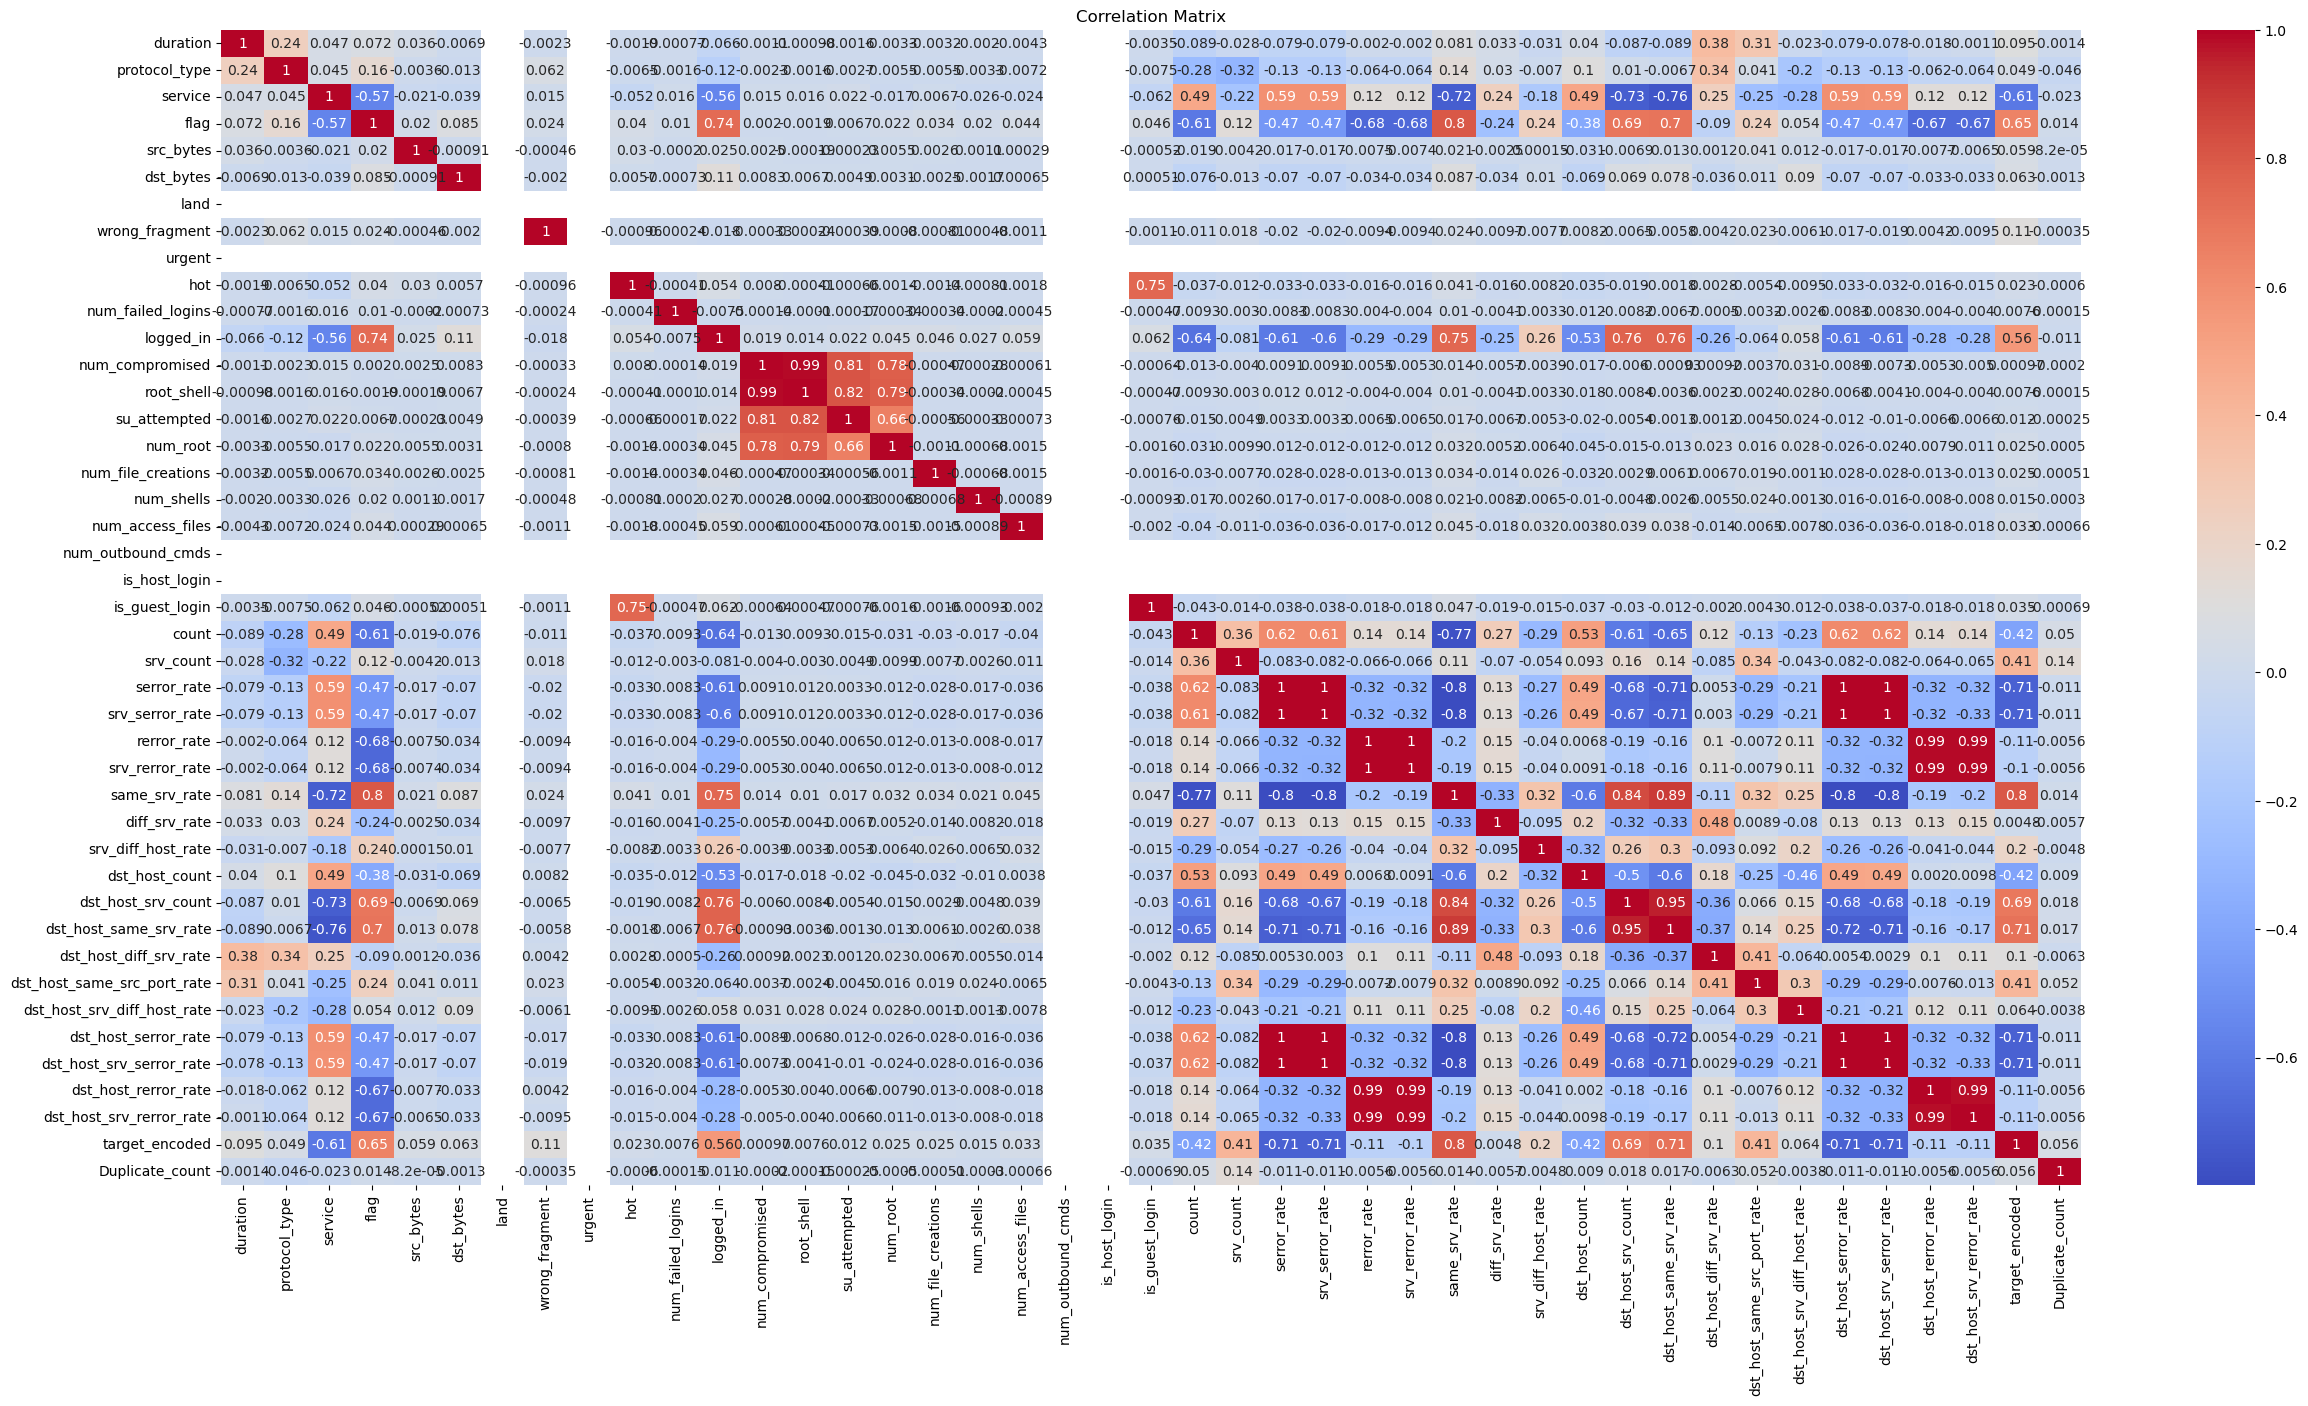

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = training_df.corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [77]:
training_df.corr()['target_encoded'].sort_values()

dst_host_srv_serror_rate      -0.708408
dst_host_serror_rate          -0.708345
serror_rate                   -0.707989
srv_serror_rate               -0.707298
service                       -0.612680
dst_host_count                -0.416245
count                         -0.416143
dst_host_rerror_rate          -0.107929
rerror_rate                   -0.106053
dst_host_srv_rerror_rate      -0.105280
srv_rerror_rate               -0.104260
num_compromised                0.000973
diff_srv_rate                  0.004794
root_shell                     0.007576
num_failed_logins              0.007576
su_attempted                   0.012372
num_shells                     0.015154
hot                            0.023318
num_root                       0.025406
num_file_creations             0.025442
num_access_files               0.033204
is_guest_login                 0.034752
protocol_type                  0.048647
Duplicate_count                0.056473
src_bytes                      0.058608


In [78]:
training_df.drop(inplace=True,columns=['num_outbound_cmds','is_host_login','urgent','land','serror_rate','rerror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','root_shell'])

In [79]:
training_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target_encoded,Duplicate_count
0,0,1,44,3,0,0,0,0,0,0,...,0.06,0.0,255,1,0.00,0.08,0.00,0.00,2,1
1,0,0,14,7,520,0,0,0,0,0,...,0.00,0.0,255,255,1.00,0.00,1.00,0.00,8,1653
2,0,0,14,7,1032,0,0,0,0,0,...,0.00,0.0,255,255,1.00,0.00,1.00,0.00,8,9684
3,0,1,44,3,0,0,0,0,0,0,...,0.05,0.0,255,12,0.05,0.06,0.00,0.00,2,1
4,0,0,14,7,520,0,0,0,0,0,...,0.00,0.0,255,255,1.00,0.00,1.00,0.00,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24476,0,1,22,7,350,396,0,0,0,1,...,0.00,0.0,255,255,1.00,0.00,0.00,0.00,4,1
24477,0,1,22,7,230,16213,0,0,0,1,...,0.00,0.0,25,255,1.00,0.00,0.04,0.02,4,1
24481,0,1,44,3,0,0,0,0,0,0,...,0.07,0.0,255,9,0.04,0.07,0.00,0.00,2,1
24486,0,1,44,3,0,0,0,0,0,0,...,0.07,0.0,255,3,0.01,0.07,0.00,0.00,2,1


# Clustering Using DBSCAN 

In [80]:
X_train_small=training_df.drop(['target_encoded','Duplicate_count'],axis=1).values
y_train_small=training_df[['target_encoded']].values
scaler = StandardScaler()
# Normalize the data
X_train_small = scaler.fit_transform(X_train_small)

(0.0, 2.0)

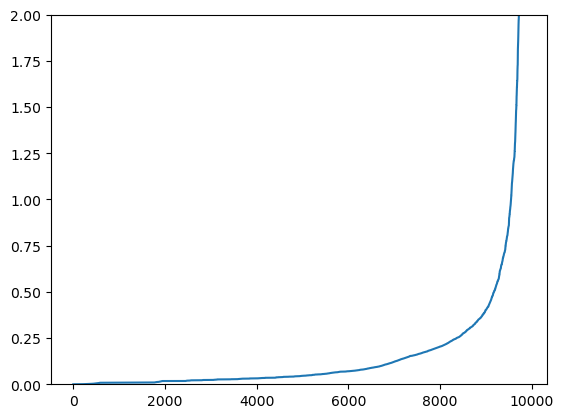

In [81]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

minpts = X_train_small.shape[1] + 1
model = NearestNeighbors(n_neighbors=minpts-1)
res = model.fit(X_train_small)
dis,ind = res.kneighbors(X_train_small)
dis = np.sort(dis,axis=0)
dis = dis[:,1]
plt.plot(dis)
plt.ylim([0, 2])


In [82]:
import numpy as np

def dbscan(X, eps, min_pts):
    labels = np.zeros(len(X), dtype=int)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != 0:
            continue
        neighbors = find_neighbors(X, i, eps)
        if len(neighbors) < min_pts:
            labels[i] = -1
            continue
        cluster_id += 1
        labels[i] = cluster_id
        expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_pts)
    return labels

def find_neighbors(X, i, eps):
    dists = np.linalg.norm(X - X[i], axis=1)
    return np.where(dists <= eps)[0].tolist()

def expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_pts):
    for j in neighbors:
        if labels[j] == -1:
            labels[j] = cluster_id
        elif labels[j] == 0:
            labels[j] = cluster_id
            new_neighbors = find_neighbors(X, j, eps)
            if len(new_neighbors) >= min_pts:
                neighbors.extend(new_neighbors)


In [89]:
eps = 0.3
min_samples = X_train_small.shape[1] + 1
labo = dbscan(X_train_small,eps,min_samples)

In [90]:
y_train=training_df[['target_encoded']]

In [91]:
y_train = np.array(y_train)[:,0]

In [92]:
def dicto(label):
    unique_vals = np.unique(labo)
    classifications_index={}
    for i in unique_vals:
        if i==-1:
            i = 0
        classifications_index[i] = []
    for i,x in enumerate(label):
        if x == -1:
            x = 0
        classifications_index[x].append(i)
    return classifications_index

def max_matching(clusters_dict,labels):
    clusters={}
    for idx , x in clusters_dict.items():
        if x: #if a cluster has members
            cluster=labels[x].astype(np.int64)
        else:
            clusters[idx]=[None,0]
            continue
        counts = np.bincount(cluster)
        # get the most repeated number
        most_repeated_num = np.argmax(counts)
        
        clusters[idx]=[most_repeated_num,counts[most_repeated_num]]
    return clusters
def calculate_presicion(cluster_dict,majority_dict):
    p=[]
    for idx,c in cluster_dict.items():
        if len(c) > 0:
            p.append(majority_dict[idx][1]/len(c))
        else:
            p.append(0.01)
    return p
def calculate_recall(majority_dict,labels):
    recall=[]
    # count the number of occurrences of each integer in the array
    counts = np.bincount(labels.astype(int))
    for idx,c in majority_dict.items():
        if majority_dict[idx][1] > 0:
            recall.append(majority_dict[idx][1]/counts[majority_dict[idx][0]])
        else:
            recall.append(0.01)
    return recall
def F_measure(presicion,recall):
    F=[]
    for i in range(len(presicion)):
        F.append((2*presicion[i]*recall[i])/(presicion[i]+recall[i]))

    F=np.array(F)
    return np.sum(F)/len(F)
def condtional_entropy(cluster_dict,labels):
    entropys=[]
    counts_of_all = np.bincount(labels.astype(int))
    size_of_clusters=[]
    keys=np.unique(labels)
    
    for idx,c in cluster_dict.items():
        
        in_cluster_count=np.bincount(labels[c].astype(int))
        size_of_clusters.append(len(c))
        
        result=0
        for key in keys :
            
            if key < len(in_cluster_count): #class doesn't exist in this cluster
                eq=in_cluster_count[key]/size_of_clusters[idx]
                if eq == 0.0:
                    continue

                result+=-eq*math.log2(eq)
        entropys.append(result)
    size_of_samples=sum(size_of_clusters)
    total_entropy=0
    for idx,nij in enumerate(size_of_clusters):
        total_entropy+=(nij/size_of_samples)*entropys[idx]
    return total_entropy
def evalu(predicted,labels):
    cluster_dict = dicto(predicted)
    maj = max_matching(cluster_dict,labels)
    p = calculate_presicion(cluster_dict,maj)
    print("Presicion=",p)
    recall = calculate_recall(maj,labels)
    print("Recall=",recall)
    f = F_measure(p,recall)
    print("F_Measure=",f)
    entropy = condtional_entropy(cluster_dict,labels)
    print("Entropy=",entropy)

In [93]:
evalu(labo,np.array(y_train))

Presicion= [0.8146167557932263, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall= [0.5886646629454702, 0.7433044911413268, 0.21768999570631173, 0.17779151215492378, 0.13224559896951482, 0.04229282954057535, 0.6164383561643836, 0.009446114212108201, 0.009660798626019752, 0.296875]
F_Measure= 0.3768803158537416
Entropy= 0.35736889193194105


   ## using one hot encoding
   


In [100]:
training_df = encode(training_data)

In [101]:
training_df = remove_duplicates(training_df)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1442: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.reset_index(level=level, drop=drop)


In [102]:
training_df.drop(inplace=True,columns=['num_outbound_cmds','is_host_login','urgent','land','serror_rate','rerror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','root_shell'])

In [103]:
X_train_small=training_df.drop(['target_encoded','Duplicate_count'],axis=1).values
y_train_small=training_df[['target_encoded']].values
scaler = StandardScaler()
# Normalize the data
X_train_small = scaler.fit_transform(X_train_small)

(0.0, 2.0)

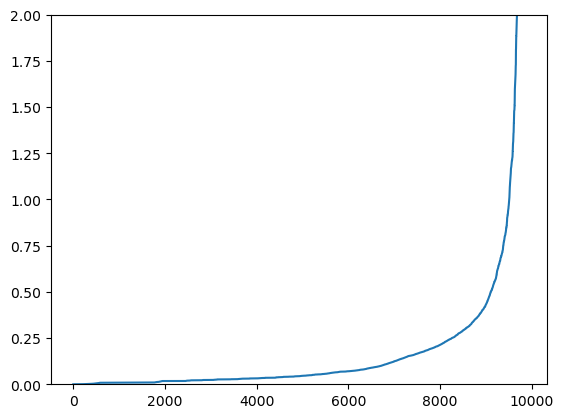

In [104]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

minpts = X_train_small.shape[1] + 1
model = NearestNeighbors(n_neighbors=minpts-1)
res = model.fit(X_train_small)
dis,ind = res.kneighbors(X_train_small)
dis = np.sort(dis,axis=0)
dis = dis[:,1]
plt.plot(dis)
plt.ylim([0, 2])


In [105]:
eps = 0.3
min_samples = X_train_small.shape[1] + 1
labo = dbscan(X_train_small,eps,min_samples)

In [106]:
y_train=training_df[['target_encoded']]

In [107]:
y_train = np.array(y_train)[:,0]

In [108]:
evalu(labo,np.array(y_train))

Presicion= [0.8140526976160603, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall= [0.6964362387290682, 0.7371240214256284, 0.1464147702876771, 0.09641532756489493, 0.04229282954057535, 0.08055212196126905, 0.04229282954057535, 0.07256333190210391]
F_Measure= 0.3096688713251823
Entropy= 0.4317038436854223
